# Visualization of Data Logs

## 1 Preparation

### Library Preparation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os

from plots import (plot_confusion_matrix, plot_learning_rate, plot_training_log, dual_plot_training_log, 
                    plot_triple_model, dual_plot_triple_model, plot_data_split, plot_triple_data_split, 
                    plot_triple_class_dist)

### Directory Preparation

In [ ]:
LOG_DIR = './logs/'
OUTPUT_DIR = './images/'
for dir in [LOG_DIR, OUTPUT_DIR]:
    os.makedirs(OUTPUT_DIR, exist_ok=True)

## 2 Data Composition

In [ ]:
dist_binary = pd.read_csv(os.path.join(LOG_DIR, 'class_distribution_binary.csv'))
dist_quinary = pd.read_csv(os.path.join(LOG_DIR, 'class_distribution_quinary.csv'))
dist_main = pd.read_csv(os.path.join(LOG_DIR, 'class_distribution_main.csv'))

### Data Split Proportion

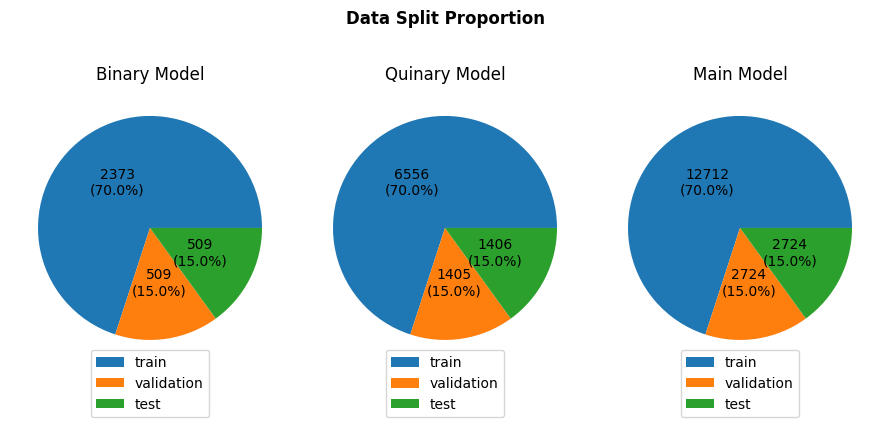

In [11]:
order = ['train', 'validation', 'test']
df_binary = dist_binary.groupby('data_subset')['count'].sum().reindex(order)
df_quinary = dist_quinary.groupby('data_subset')['count'].sum().reindex(order)
df_main = dist_main.groupby('data_subset')['count'].sum().reindex(order)
title1 = 'Binary Model'
title2 = 'Quinary Model'
title3 = 'Main Model'
suptitle = 'Data Split Proportion'
l = [(df_binary, title1), (df_quinary, title2), (df_main, title3)]
plot_triple_data_split(l, suptitle=suptitle, filename='data_split_all')

### Class Distribution

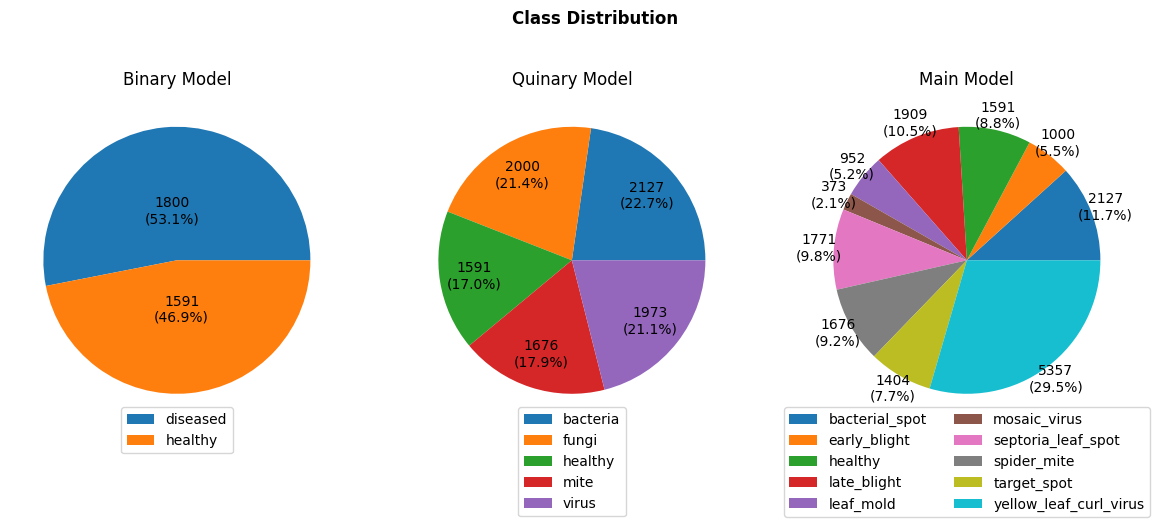

In [12]:
order = ['train', 'validation', 'test']
# df_binary = dist_binary.groupby(['data_subset', 'class_name'])['count'].sum()
# df_quinary = dist_quinary.groupby(['data_subset', 'class_name'])['count'].sum()
# df_main = dist_main.groupby(['data_subset', 'class_name'])['count'].sum()
df_binary = dist_binary.groupby(['class_name'])['count'].sum()
df_quinary = dist_quinary.groupby(['class_name'])['count'].sum()
df_main = dist_main.groupby(['class_name'])['count'].sum()
df_dict = {'Binary Model': df_binary, 'Quinary Model': df_quinary, 'Main Model': df_main}

plot_triple_class_dist(df_dict=df_dict, suptitle='Class Distribution', filename='class_dist_all')

## 3 Model Training History

In [ ]:
log_binary = pd.read_csv(os.path.join(LOG_DIR, 'training_log_binary.csv'))
log_quinary = pd.read_csv(os.path.join(LOG_DIR, 'training_log_quinary.csv'))
log_main = pd.read_csv(os.path.join(LOG_DIR, 'training_log_main.csv'))
log_main.tail(1)

### Train and Validation Subset Comparison

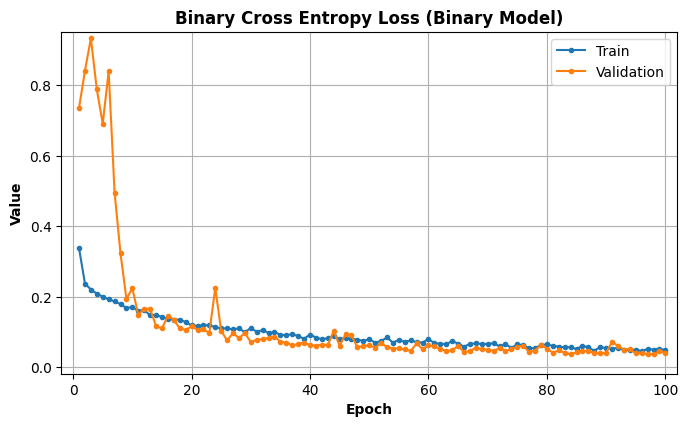

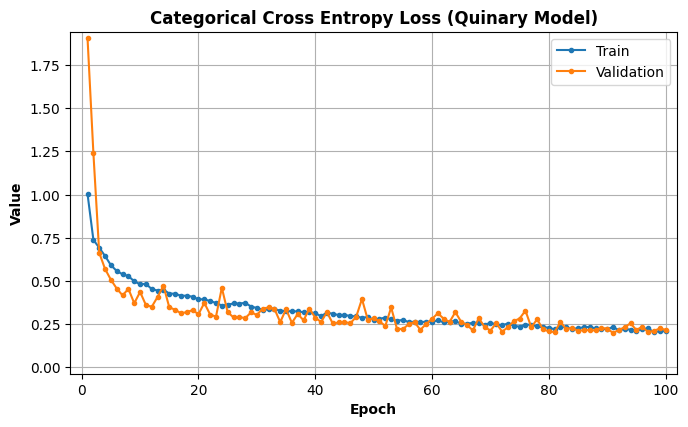

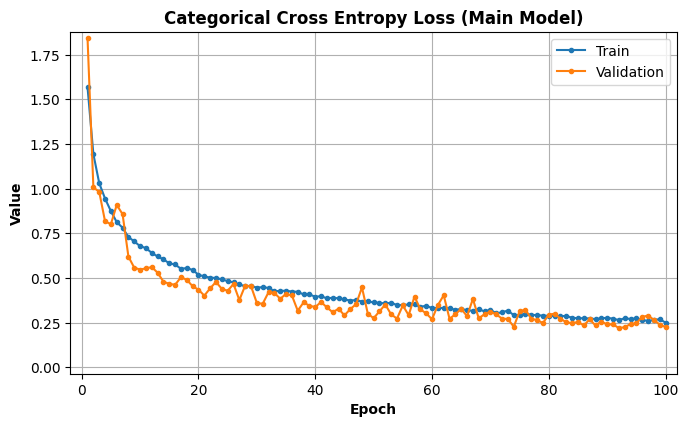

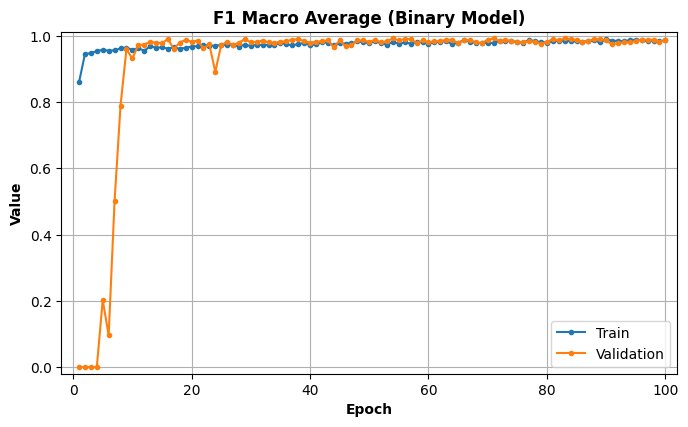

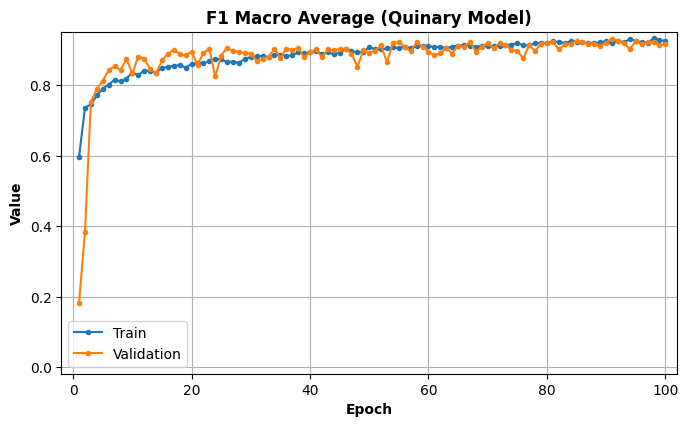

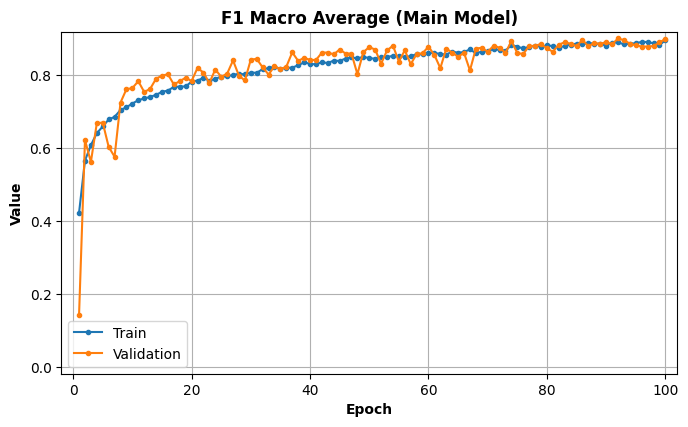

In [14]:
plot_training_log(train_arr=log_binary['loss'], val_arr=log_binary['val_loss'], title='Binary Cross Entropy Loss (Binary Model)', filename='loss_binary')
plot_training_log(train_arr=log_quinary['loss'], val_arr=log_quinary['val_loss'], title='Categorical Cross Entropy Loss (Quinary Model)', filename='loss_quinary')
plot_training_log(train_arr=log_main['loss'], val_arr=log_main['val_loss'], title='Categorical Cross Entropy Loss (Main Model)', filename='loss_main')

plot_training_log(train_arr=log_binary['f1_macro'], val_arr=log_binary['val_f1_macro'], title='F1 Macro Average (Binary Model)', filename='f1_binary')
plot_training_log(train_arr=log_quinary['f1_macro'], val_arr=log_quinary['val_f1_macro'], title='F1 Macro Average (Quinary Model)', filename='f1_quinary')
plot_training_log(train_arr=log_main['f1_macro'], val_arr=log_main['val_f1_macro'], title='F1 Macro Average (Main Model)', filename='f1_main')

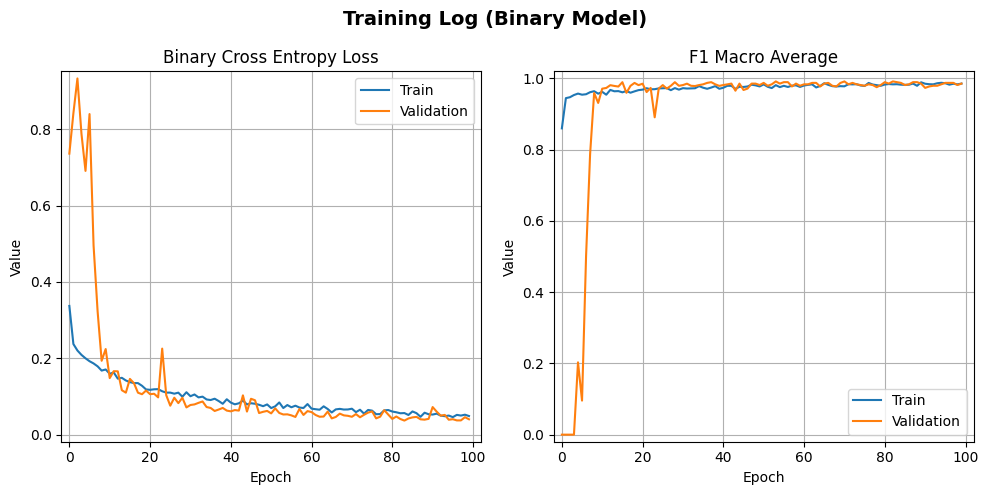

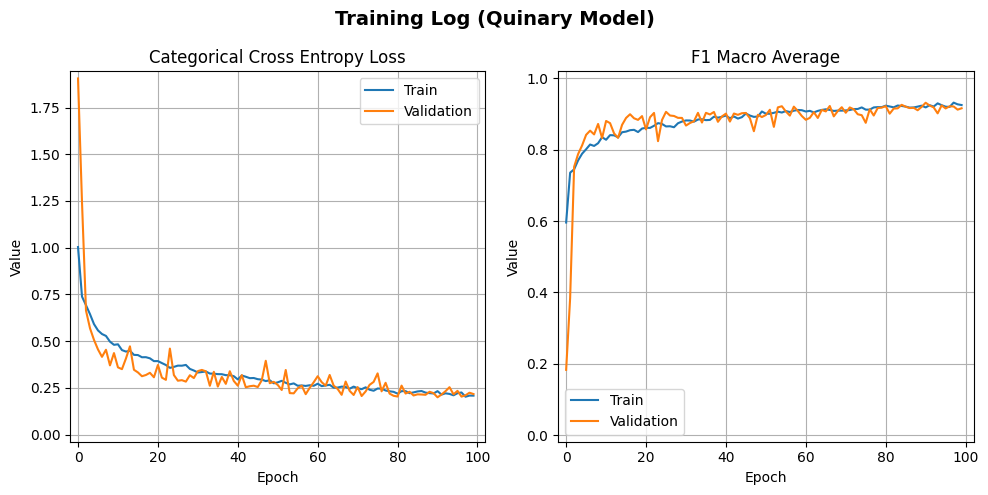

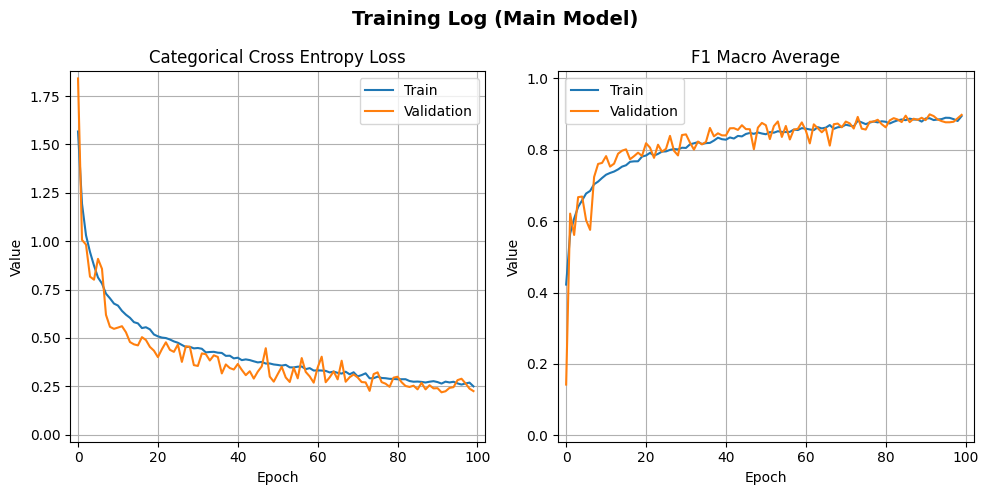

In [15]:
dual_plot_training_log(suptitle='Training Log (Binary Model)', 
                       filename='log_binary', 
                       train_arr1=log_binary['loss'], val_arr1=log_binary['val_loss'], title1='Binary Cross Entropy Loss', 
                       train_arr2=log_binary['f1_macro'], val_arr2=log_binary['val_f1_macro'], title2='F1 Macro Average')
dual_plot_training_log(suptitle='Training Log (Quinary Model)', 
                       filename='log_quinary', 
                       train_arr1=log_quinary['loss'], val_arr1=log_quinary['val_loss'], title1='Categorical Cross Entropy Loss', 
                       train_arr2=log_quinary['f1_macro'], val_arr2=log_quinary['val_f1_macro'], title2='F1 Macro Average')
dual_plot_training_log(suptitle='Training Log (Main Model)', 
                       filename='log_main', 
                       train_arr1=log_main['loss'], val_arr1=log_main['val_loss'], title1='Categorical Cross Entropy Loss', 
                       train_arr2=log_main['f1_macro'], val_arr2=log_main['val_f1_macro'], title2='F1 Macro Average')

### Model Comparison

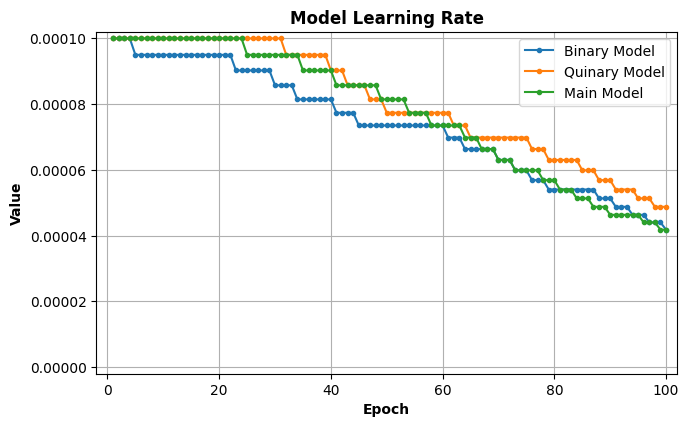

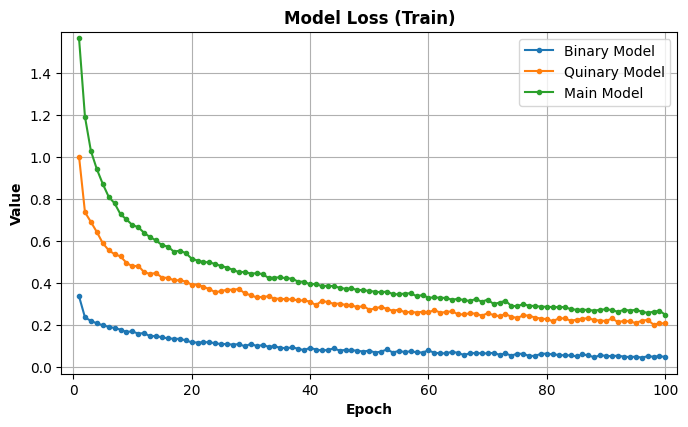

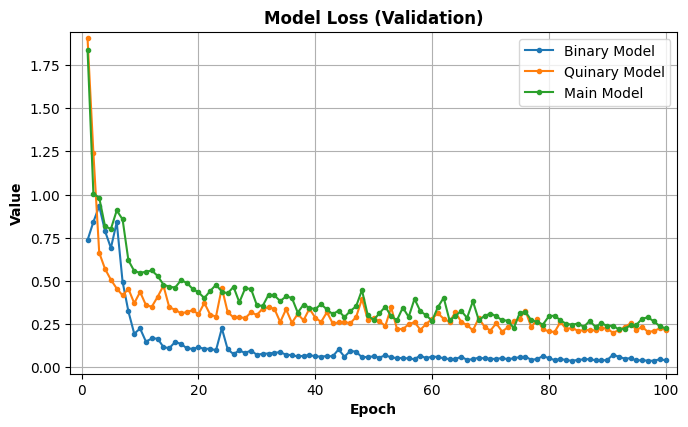

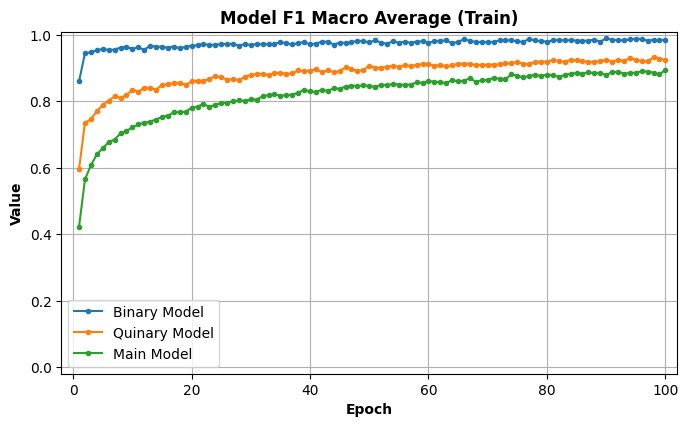

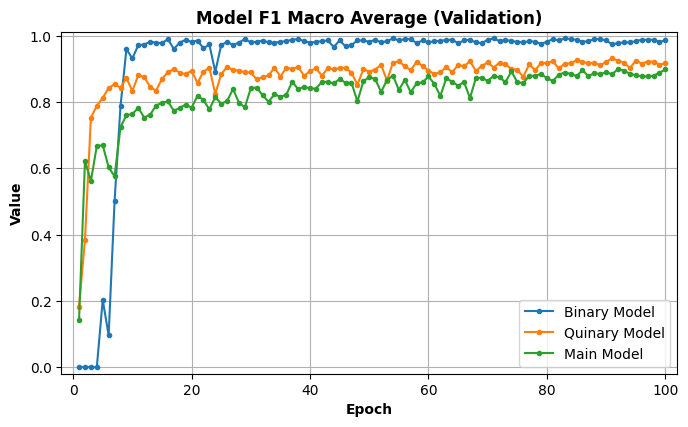

In [16]:
plot_triple_model(arr_binary=log_binary['learning_rate'], 
                  arr_quinary=log_quinary['learning_rate'], 
                  arr_main=log_main['learning_rate'], 
                  title='Model Learning Rate', 
                  filename='lr_all')
plot_triple_model(arr_binary=log_binary['loss'], 
                  arr_quinary=log_quinary['loss'], 
                  arr_main=log_main['loss'], 
                  title='Model Loss (Train)', 
                  filename='train_loss_all')
plot_triple_model(arr_binary=log_binary['val_loss'], 
                  arr_quinary=log_quinary['val_loss'], 
                  arr_main=log_main['val_loss'], 
                  title='Model Loss (Validation)', 
                  filename='val_loss_all')
plot_triple_model(arr_binary=log_binary['f1_macro'], 
                  arr_quinary=log_quinary['f1_macro'], 
                  arr_main=log_main['f1_macro'], 
                  title='Model F1 Macro Average (Train)', 
                  filename='train_f1_all')
plot_triple_model(arr_binary=log_binary['val_f1_macro'], 
                  arr_quinary=log_quinary['val_f1_macro'], 
                  arr_main=log_main['val_f1_macro'], 
                  title='Model F1 Macro Average (Validation)', 
                  filename='val_f1_all')

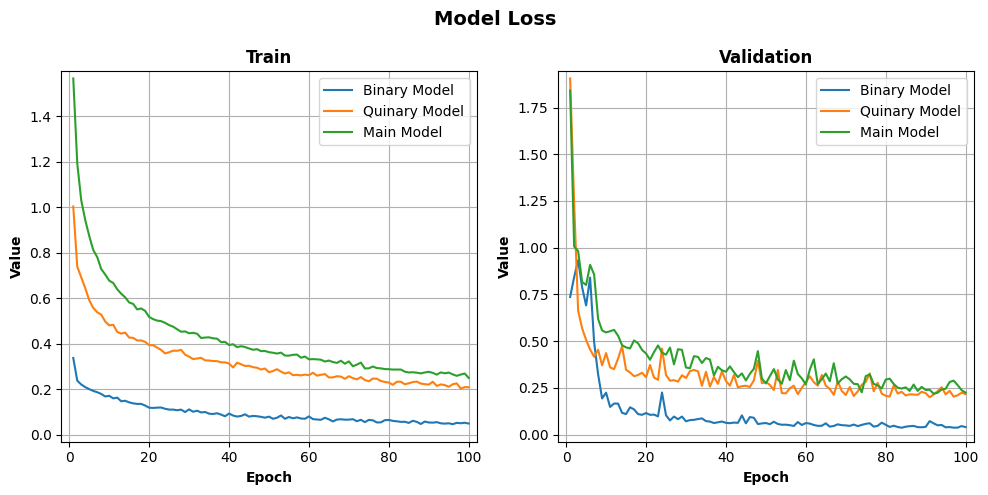

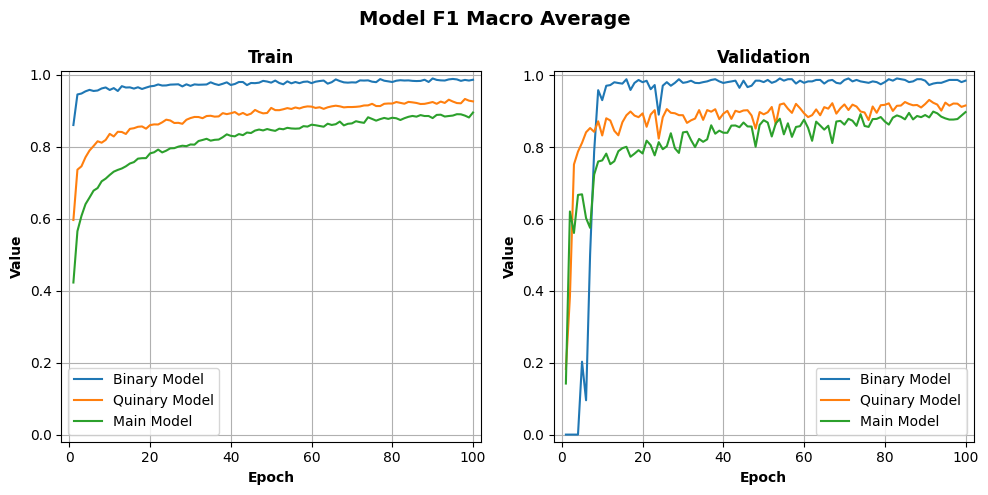

In [17]:
dual_plot_triple_model(suptitle='Model Loss', filename='loss_all', 
                       train_arr_binary=log_binary['loss'], train_arr_quinary=log_quinary['loss'], train_arr_main=log_main['loss'], title1='Train', 
                       val_arr_binary=log_binary['val_loss'], val_arr_quinary=log_quinary['val_loss'], val_arr_main=log_main['val_loss'], title2='Validation')
dual_plot_triple_model(suptitle='Model F1 Macro Average', filename='f1_all', 
                       train_arr_binary=log_binary['f1_macro'], train_arr_quinary=log_quinary['f1_macro'], train_arr_main=log_main['f1_macro'], title1='Train', 
                       val_arr_binary=log_binary['val_f1_macro'], val_arr_quinary=log_quinary['val_f1_macro'], val_arr_main=log_main['val_f1_macro'], title2='Validation')